In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
sys.path.append('..')
from plot_helpers import *
import warnings
warnings.filterwarnings('ignore')

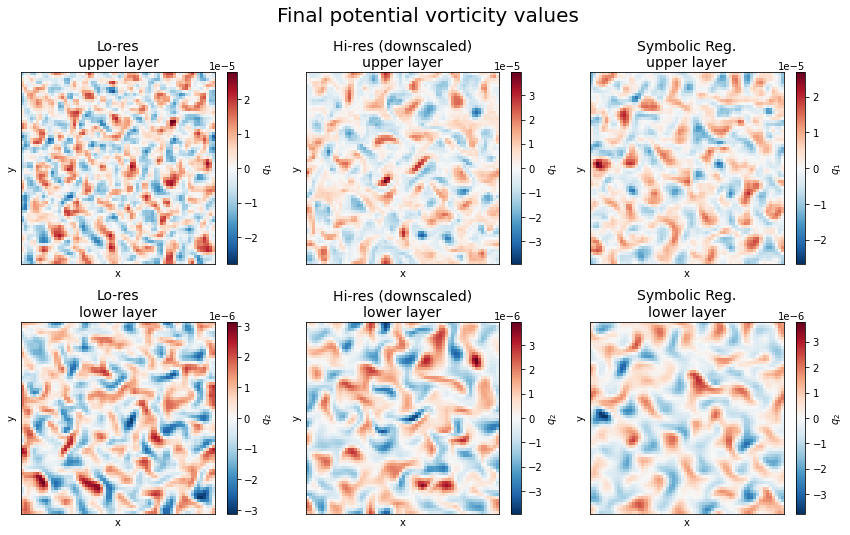

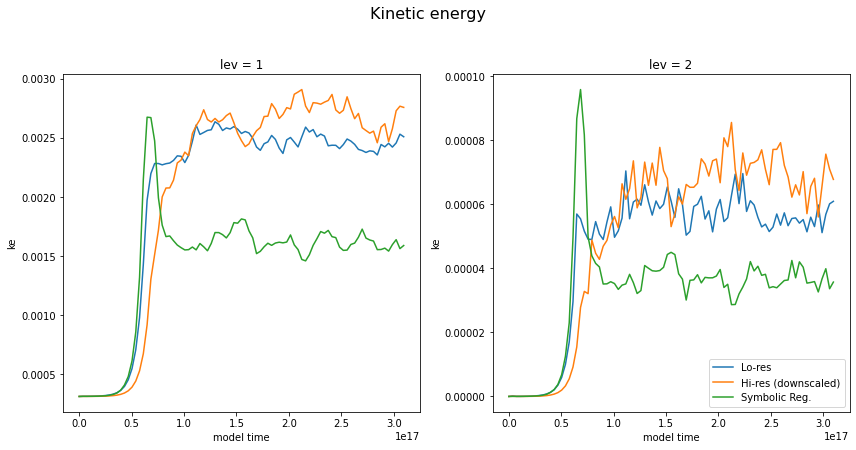

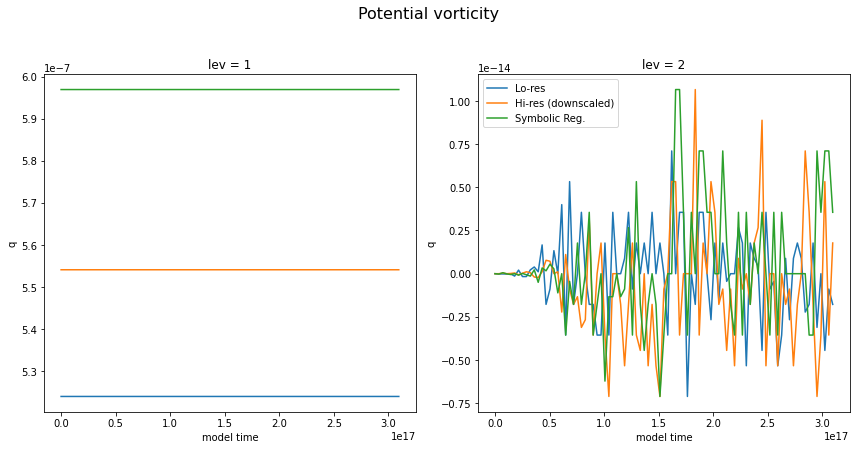

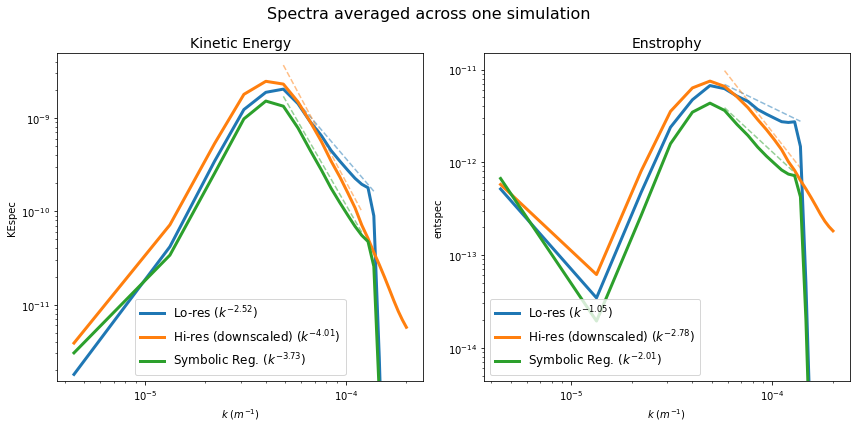

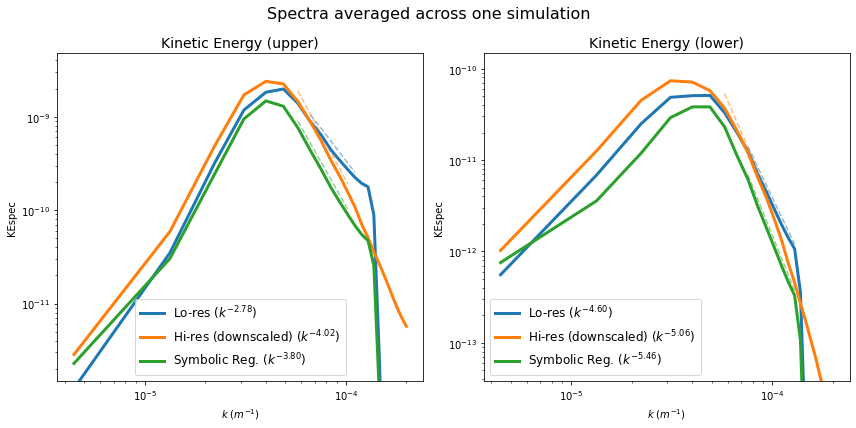

In [16]:
lores = xr.open_dataset("../foo/control.nc").assign_attrs(plot_kwargs=dict(label='Lo-res'))
hires = xr.open_dataset("../foo/lores.nc").assign_attrs(plot_kwargs=dict(label='Hi-res (downscaled)'))
param = xr.open_dataset("../foo/symbolic.nc").assign_attrs(plot_kwargs=dict(label='Symbolic Reg.'))

runs = [lores,hires,param]
runs = [r.expand_dims('run') for r in runs]

for run in runs:
    run['ke'] = (run.ufull**2 + run.vfull**2)*0.5

with figure_grid(2, len(runs), rowwidth=len(runs)*4, rowheight=3.75) as g:
    g.title(f"Final potential vorticity values", y=0.95, fontsize=20)
    for z, layer in zip([0,1], ['upper','lower']):
        for run in runs:
            g.next()
            run.q.isel(time=-1, lev=z, run=-1).plot(cbar_kwargs=dict(label='$q_'+str(z+1)+'$'))
            plt.title(f"{run.attrs['plot_kwargs']['label']}\n{layer} layer", fontsize=14)
            plt.xlabel('x'); plt.xticks([])
            plt.ylabel('y'); plt.yticks([])  
            
with figure_grid(1,2,rowheight=6) as g:
    g.title("Kinetic energy")
    for z in [0,1]:
        g.next()
        for run in runs:
            run.ke.isel(lev=z).mean(dim='run').mean(dim=['y','x']).plot(**run.attrs['plot_kwargs'])
    plt.legend()
            
with figure_grid(1,2,rowheight=6) as g:
    g.title("Potential vorticity")
    for z in [0,1]:
        g.next()
        for run in runs:
            run.q.isel(lev=z).mean(dim='run').mean(dim=['y','x']).plot(**run.attrs['plot_kwargs'])
    plt.legend()
        
with figure_grid(1,2,rowheight=6) as g:
    g.title(f"Spectra averaged across one simulation", y=0.95)
    g.next()
    plot_spectra('KEspec', runs, z='sum', loglog_fit=True)
    plt.title("Kinetic Energy", fontsize=14)
    g.next()
    plot_spectra('entspec', runs, loglog_fit=True)
    plt.title("Enstrophy", fontsize=14)
    
with figure_grid(1,2,rowheight=6) as g:
    g.title(f"Spectra averaged across one simulation", y=0.95)
    g.next()
    plot_spectra('KEspec', runs, z=0, loglog_fit=True, offset=3, mult=1.5)
    plt.title("Kinetic Energy (upper)", fontsize=14)
    g.next()
    plot_spectra('KEspec', runs, z=1, loglog_fit=True, offset=4, mult=1.5)
    plt.title("Kinetic Energy (lower)", fontsize=14)

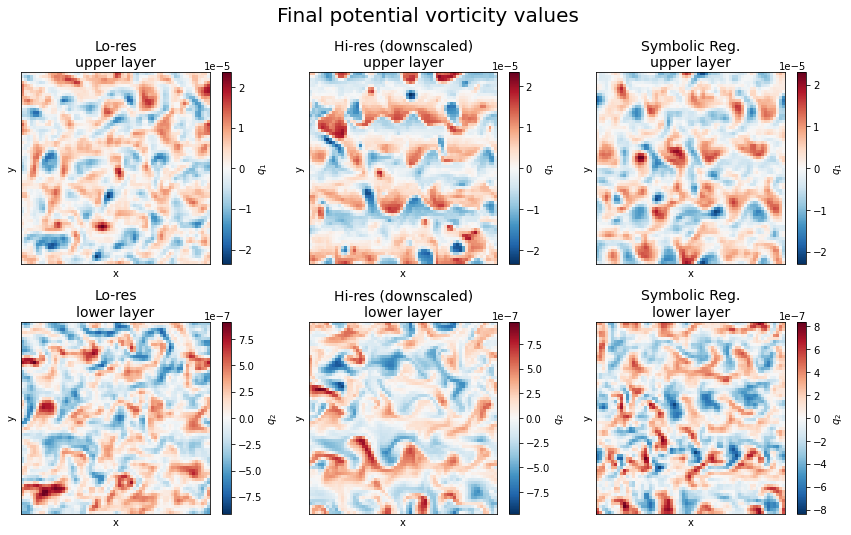

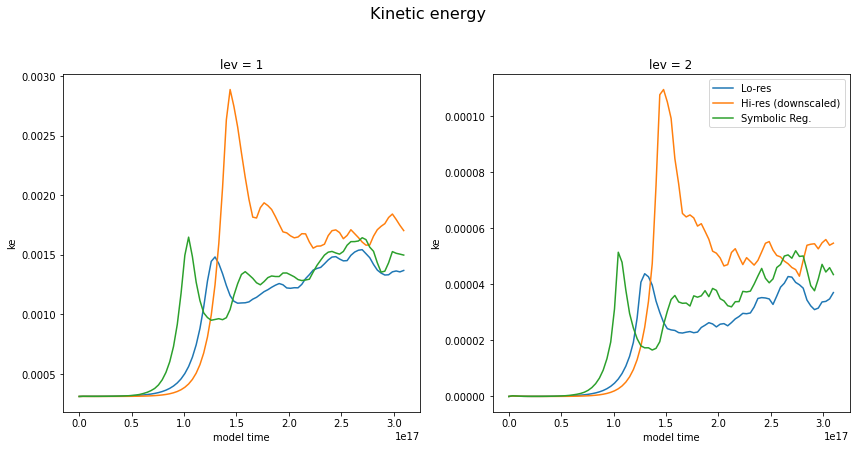

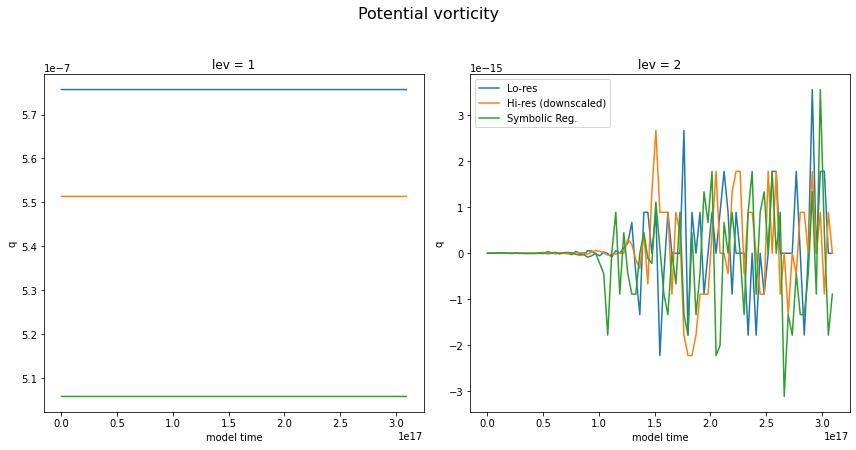

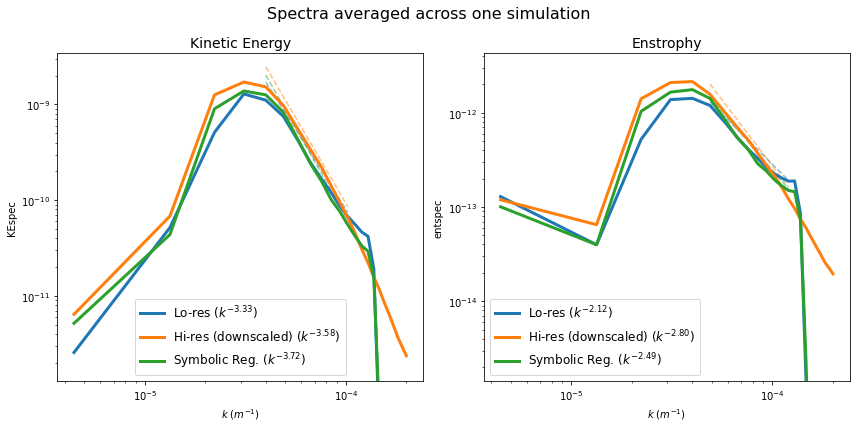

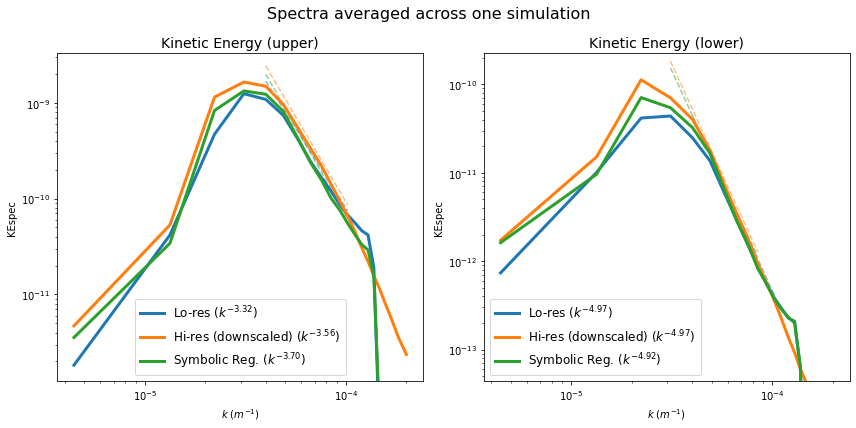

In [15]:
lores = xr.open_dataset("../baz/control.nc").assign_attrs(plot_kwargs=dict(label='Lo-res'))
hires = xr.open_dataset("../baz/lores.nc").assign_attrs(plot_kwargs=dict(label='Hi-res (downscaled)'))
param = xr.open_dataset("../baz/symbolic.nc").assign_attrs(plot_kwargs=dict(label='Symbolic Reg.'))

runs = [lores,hires,param]
runs = [r.expand_dims('run') for r in runs]

for run in runs:
    run['ke'] = (run.ufull**2 + run.vfull**2)*0.5

with figure_grid(2, len(runs), rowwidth=len(runs)*4, rowheight=3.75) as g:
    g.title(f"Final potential vorticity values", y=0.95, fontsize=20)
    for z, layer in zip([0,1], ['upper','lower']):
        for run in runs:
            g.next()
            run.q.isel(time=-1, lev=z, run=-1).plot(cbar_kwargs=dict(label='$q_'+str(z+1)+'$'))
            plt.title(f"{run.attrs['plot_kwargs']['label']}\n{layer} layer", fontsize=14)
            plt.xlabel('x'); plt.xticks([])
            plt.ylabel('y'); plt.yticks([])  
            
with figure_grid(1,2,rowheight=6) as g:
    g.title("Kinetic energy")
    for z in [0,1]:
        g.next()
        for run in runs:
            run.ke.isel(lev=z).mean(dim='run').mean(dim=['y','x']).plot(**run.attrs['plot_kwargs'])
    plt.legend()
            
with figure_grid(1,2,rowheight=6) as g:
    g.title("Potential vorticity")
    for z in [0,1]:
        g.next()
        for run in runs:
            run.q.isel(lev=z).mean(dim='run').mean(dim=['y','x']).plot(**run.attrs['plot_kwargs'])
    plt.legend()
        
with figure_grid(1,2,rowheight=6) as g:
    g.title(f"Spectra averaged across one simulation", y=0.95)
    g.next()
    plot_spectra('KEspec', runs, z='sum', loglog_fit=True)
    plt.title("Kinetic Energy", fontsize=14)
    g.next()
    plot_spectra('entspec', runs, loglog_fit=True)
    plt.title("Enstrophy", fontsize=14)
    
with figure_grid(1,2,rowheight=6) as g:
    g.title(f"Spectra averaged across one simulation", y=0.95)
    g.next()
    plot_spectra('KEspec', runs, z=0, loglog_fit=True)
    plt.title("Kinetic Energy (upper)", fontsize=14)
    g.next()
    plot_spectra('KEspec', runs, z=1, loglog_fit=True)
    plt.title("Kinetic Energy (lower)", fontsize=14)